# Prueba de CUDA - Tutorial

En esta enrtada vamos a comparar el rendimiento entre CPU y GPU para multiplicación de matrices

### Instalación de Paquetes

Para usar GPU con PyTorch necesitas instalar una versión de PyTorch con soporte CUDA para tu versión de CUDA (para configurar CUDA puedes ver este [enlace](https://youtu.be/BBQWnSJme_A?si=tbrBq2mKD6338RAv)). Un comando de ejemplo (ajusta la versión de CUDA si corresponde):

```bash
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121
```

Ejecuta esto en el ambiente donde correrás el notebook.


### Comprobación de CUDA

Primero comprobamos si PyTorch detecta una GPU disponible y mostramos el nombre del dispositivo.

In [1]:
import torch
print('¿CUDA disponible?:', torch.cuda.is_available())
if torch.cuda.is_available():
    print('Nombre del dispositivo:', torch.cuda.get_device_name(0))
else:
    print('No se detectó GPU CUDA.')

¿CUDA disponible?: True
Nombre del dispositivo: NVIDIA GeForce RTX 3060


### Comparación CPU vs GPU

A continuación haremos una comparación sencilla usando la multiplicación de matrices. 


Este primer ejemplo usa matrices pequeñas para mostrar la mecánica. No esperes que la GPU gane en este caso; es sólo para ilustrar cómo medir.

In [2]:
import torch
# Creo matrices aleatorias
x = torch.rand(3, 3)
y = torch.rand(3, 3)

# Mido el tiempo en CPU
print("Tiempo en CPU (3x3):")
%timeit x@y

# Paso las matrices a GPU
x_gpu = x.to('cuda')
y_gpu = y.to('cuda')

# Mido el tiempo en GPU
print("Tiempo en GPU (3x3):")
%timeit x_gpu @ y_gpu

Tiempo en CPU (3x3):
1.79 μs ± 5.45 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
Tiempo en GPU (3x3):
17.7 μs ± 262 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


Para operaciones muy pequeñas (ej. 3x3), la sobrecarga de mover datos y lanzamiento de kernels puede hacer que la GPU sea más lenta que la CPU.

Ahora, realicemos la misma operación pero con matrices más grandes para ver una diferencia significativa en rendimiento entre CPU y GPU.

In [1]:
import torch
# Creo matrices aleatorias grandes
x = torch.rand(10000, 10000)
y = torch.rand(10000, 10000)

# Mido el tiempo en CPU
print("Tiempo en CPU (10000x10000):")
%timeit x @ y

# Paso las matrices a GPU
x_gpu = x.to('cuda')
y_gpu = y.to('cuda')

# Mido el tiempo en GPU
print("Tiempo en GPU (10000x10000):")
%timeit x_gpu @ y_gpu

Tiempo en CPU (10000x10000):
2.95 s ± 30.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Tiempo en GPU (10000x10000):
The slowest run took 5.46 times longer than the fastest. This could mean that an intermediate result is being cached.
34.4 μs ± 29.4 μs per loop (mean ± std. dev. of 7 runs, 1 loop each)


Como se puede observar, al usar matrices grandes la GPU muestra una ventaja significativa en tiempo de ejecución comparado con la CPU, demostrando su capacidad para manejar operaciones paralelas de manera eficiente.

### Gráfico comparativo

Para visualizar mejor la diferencia de rendimiento, podemos graficar los tiempos de ejecución para ambas operaciones (CPU y GPU) usando `matplotlib`.

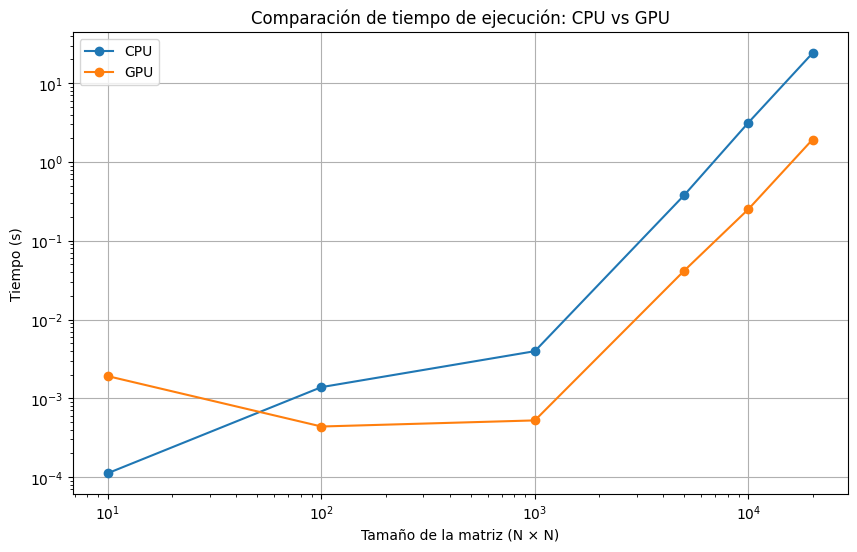

In [1]:
import time
import torch
import matplotlib.pyplot as plt

sizes = [10, 100, 1000, 5000, 10000, 20000]

cpu_times = []
gpu_times = []

# Prueba en seco para "despertar" la GPU
_ = torch.rand(100, 100, device="cuda") @ torch.rand(100, 100, device="cuda")
torch.cuda.synchronize()

for n in sizes:
    x = torch.rand(n, n)
    y = torch.rand(n, n)

    # CPU
    t0 = time.perf_counter()
    _ = x @ y
    t1 = time.perf_counter()
    cpu_times.append(t1 - t0)

    # GPU
    xg = x.to("cuda")
    yg = y.to("cuda")

    start = torch.cuda.Event(enable_timing=True)
    end = torch.cuda.Event(enable_timing=True)

    start.record()
    _ = xg @ yg
    end.record()

    torch.cuda.synchronize()
    gpu_times.append(start.elapsed_time(end) / 1000)  # segundos

# Gráfico
plt.figure(figsize=(10, 6))
plt.plot(sizes, cpu_times, marker="o", label="CPU")
plt.plot(sizes, gpu_times, marker="o", label="GPU")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Tamaño de la matriz (N × N)")
plt.ylabel("Tiempo (s)")
plt.title("Comparación de tiempo de ejecución: CPU vs GPU")
plt.grid(True)
plt.legend()
plt.show()
